## A Star Wars Survey

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens 'Star Wars: The Force Awakens') to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/ 'FiveThirtyEight') became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download [from their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey 'from their GitHub repository').





In [16]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [17]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [18]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Since the columns *Have you seen any of the 6 films in the Star Wars franchise?* and *Do you consider yourself to be a fan of the Star Wars film franchise?* are a yes/no question, we will now convert them to a Boolean type from their current string type to be able to handle the data easier.

In [19]:
# mapping for each new value
yes_no = {
    'Yes': True,
    'No': False,
}

# convert yes/no to true/false boolean type
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

In [20]:
# print head to make sure conversion was succesful
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We also want to conver the columns 3-9 to boolean type. In these columns the respondents answer which Star Wars movies they have seen; for each of these columns, if the value in a cell is the name of the movie, the respondent saw the movie. Therefore we can simply change the titles of the columns to *seen_i* and convert the values to a True/False boolean. 

In [21]:
# convert answers from columns 3-9 to boolean
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [22]:
# rename columns
new_names = {"Which of the following Star Wars films have you seen? Please select all that apply.": 
                         "seen_1",
            'Unnamed: 4':'seen_2',
            'Unnamed: 5':'seen_3',
            'Unnamed: 6':'seen_4',
            'Unnamed: 7':'seen_5',
            'Unnamed: 8':'seen_6',
            }
star_wars = star_wars.rename(columns=new_names)

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN. 

We'll convert eatch column to numeric type and rename the column titles. 

In [23]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

# first rows of the dataframe to make sure the changes are correct
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [24]:
star_wars = star_wars.drop(0)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

print('')
star_wars[star_wars.columns[9:15]].mean()

In [26]:
print('The mean ranking for each movie is:')
star_wars[star_wars.columns[9:15]].mean()


The mean ranking for each movie is:


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [27]:
import sys
!{sys.executable} -m pip install plotly==5.1.0 

     |████████████████████████████████| 20.6 MB 2.9 MB/s eta 0:00:01��██████████████▍   | 18.3 MB 2.9 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 4.12.0
    Uninstalling plotly-4.12.0:
      Successfully uninstalled plotly-4.12.0
You should consider upgrading via the '/dataquest/system/env/python3/bin/python3 -m pip install --upgrade pip' command.


Now that we can compute the mean ranking we will plot it in a bar chart to better understand the data. We will be using the plotly package, as it creates interactive charts that also look arguably more professional than matlpotlib charts. 

In [51]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio


In [52]:
# Bar chart using plotly
fig = px.bar(star_wars[star_wars.columns[9:15]].mean(), 
            title="Mean Ranking of Star Wars Movies",
            template="plotly_white", 
            labels={
                     "index": "Mean Ranking",
                     "value": "Star Wars Movies",
                 },)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5],
        ticktext = ['The Phantom Menace', 'Attack of the Clones', 
                    'Revenge of the Sith', 'A New Hope', 
                    'The Empire Strikes Back', 'Return of the Jedi']
    )
)
fig.layout.update(showlegend=False)

fig.show()


## Movie Rankings

It is important to remember that the best ranking a movie can have is 1; therefore, the lower mean ranking a movies has the better. 

The "original" movies are all better regarded, being the clear winner *The Empire Strikes Back*, followed by *Return of the Jedi* and *A New Hope*.

We will now take a look at the number of respondents that have seen each movie.


In [53]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [55]:
# Bar chart using plotly
fig = px.bar(star_wars[star_wars.columns[3:9]].sum(), 
            title="Total of respondents that have seen each movie",
            template="plotly_white", 
            labels={
                     "index": "Number of Respondents",
                     "value": "Star Wars Movies",
                 },)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5],
        ticktext = ['The Phantom Menace', 'Attack of the Clones', 
                    'Revenge of the Sith', 'A New Hope', 
                    'The Empire Strikes Back', 'Return of the Jedi']
    )
)
fig.layout.update(showlegend=False)

fig.show()

The highest ranked movies are precisely those that were watched by more respondents. This just reinforces the idea that the "original" movies are more widely loved. 

We now want to study how differently males and females answered the survey. 

In [56]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [72]:
fig = go.Figure(
    data=[
        go.Bar(
            name='females',
            x=females[females.columns[3:9]].sum().index,
            y=females[females.columns[3:9]].sum().values,
            offsetgroup=0,
            
        ),
        go.Bar(
            name='males',
            x=males[males.columns[3:9]].sum().index,
            y=males[males.columns[3:9]].sum().values,
            offsetgroup=0,
            base=females[females.columns[3:9]].sum().values
        ),
        
    ],
    layout=go.Layout(
        title='Respondents that have wacthed each movie by gender',
        xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5],
        ticktext = ['The Phantom Menace', 'Attack of the Clones', 
                    'Revenge of the Sith', 'A New Hope', 
                    'The Empire Strikes Back', 'Return of the Jedi']
    ),
        
        
        template="plotly_white",
        xaxis_title='Star Wars Movies',
        yaxis_title='Number of Respondents'
    )
)
fig.show()

In [57]:
# Bar chart using plotly
fig = px.bar(males[males.columns[3:9]].sum(), 
            title="Total of male respondents that have seen each movie",
            template="plotly_white", 
            labels={
                     "index": "Number of Respondents",
                     "value": "Star Wars Movies",
                 },)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5],
        ticktext = ['The Phantom Menace', 'Attack of the Clones', 
                    'Revenge of the Sith', 'A New Hope', 
                    'The Empire Strikes Back', 'Return of the Jedi']
    )
)
fig.layout.update(showlegend=False)

fig.show()

# Bar chart using plotly
fig = px.bar(females[females.columns[3:9]].sum(), 
            title="Total of female respondents that have seen each movie",
            template="plotly_white", 
            labels={
                     "index": "Number of Respondents",
                     "value": "Star Wars Movies",
                 },)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5],
        ticktext = ['The Phantom Menace', 'Attack of the Clones', 
                    'Revenge of the Sith', 'A New Hope', 
                    'The Empire Strikes Back', 'Return of the Jedi']
    )
)
fig.layout.update(showlegend=False)

fig.show()

<BarContainer object of 6 artists>

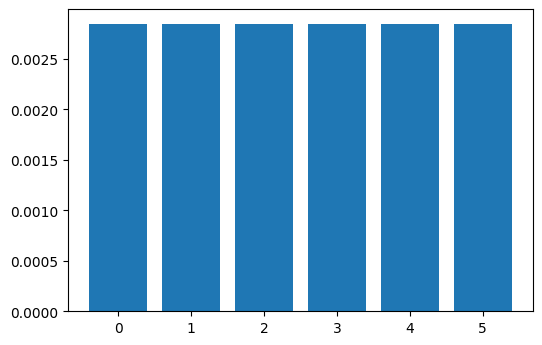

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())


In [41]:
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']